# Random Forest Classifier

Random Forest is a machine learning algorithm used for classification, regression, and feature selection. It's an ensemble technique, meaning it combines the output of one weaker technique in order to get a stronger result.


<img src='resources/rf.png'>

The weaker technique in this case is a decision tree. Decision trees work by splitting the and re-splitting the data by features. If a decision tree is split along good features, it can give a decent predictive output.

# eStatements Prediction

### Import Dependies & Libraries

In [3]:
import pandas as pd
import io
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

### Load Data 
#### Potential predictors 

The machine learning group have identified a list of the variables need to build a predictive model:
    1. Age (or Date of Birth to calculate it)
    2. Time since Last activity on your card (or Last activity date to calculate it) 
    3. Age of your account (or account origination date to calculate it) 
    4. Account status 
    5. Household income
    6. Existence of MKC
    7. Age of MKC account (or MKC account origination date to calculate it)
    8. Average Frequency of logins per year (or number of logins per reporting periods to calculate it)
    9. Average number of transactions per year (or number of transactions per reporting period to estimate it)
    10. Average spend with Kohl’s per year  (or amount the customer spent per reporting period)
    11. Signed up for e-statements or not with the indicator equal 1 or 0, respectively;
    12. Gender
    13. Reporting period (end date)
    14. Account balance at the end of each reporting period
    15. MKC account balance at the end of each reporting period

Load numerical & floating values for the moment.

Need to be complete followings,
    1. use a proper encoding mechanism in order to represent categorical data - "account_status"
    2. do feature engineering in order to extract hidden features of "MKC_sign_up" & "MKC_login_date"
    
Target Field - "estatement"

In [123]:
schema = [
          'CHD_DEL_NO_CYCLES',
          'INCOME',
          'ecs_logn_ct',
          'CHD_LFTM_NET_PRCH_AM',
          'zip5']

sample_file_name = 'Simulated_data_e_paper_statement.csv'
file_name = 'admes_000238_output_mkc_600K.csv'

df = pd.read_csv('resources/' + file_name, delimiter=',', error_bad_lines=False)
data_size = len(df)

target = df[['estatement']]
col_df = df[schema]

#### Skip corrupted rows

Load 80000 records from loaded data -

In [110]:
small_target = pd.read_csv(io.StringIO(u""+target.head(80000).to_csv(index=False)), header=None, skiprows=1)
small_df = pd.read_csv(io.StringIO(u""+col_df.head(80000).to_csv(index=False)), header=None, skiprows=1)

 #### Split data into training, validation & testing

In [124]:
X_train, X_test, y_train, y_test = train_test_split(col_df, target, test_size = 0.33, random_state = 42)

#### Intiate Random Forest Classifier & start training 

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

Ref : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.decision_path

###### Random Forest Classifier Parameters

    1. n_estimators : The number of trees in the forest.
    2. max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


In [104]:
no_of_estimators = 3
tree_depth = 5

In [125]:
rf = RandomForestClassifier(n_estimators=no_of_estimators, max_depth=tree_depth)

rf.fit(X_train.iloc[:,0:].values, y_train.iloc[:,0:].values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

##### Download Required Libraries

Execute following command if you did not install pydotplus.

sudo pip install pydotplus

### Display Dicision Trees 

Ref : http://scikit-learn.org/stable/modules/tree.html

In [126]:
import pydotplus
from IPython.display import Image, display

Tree : 0


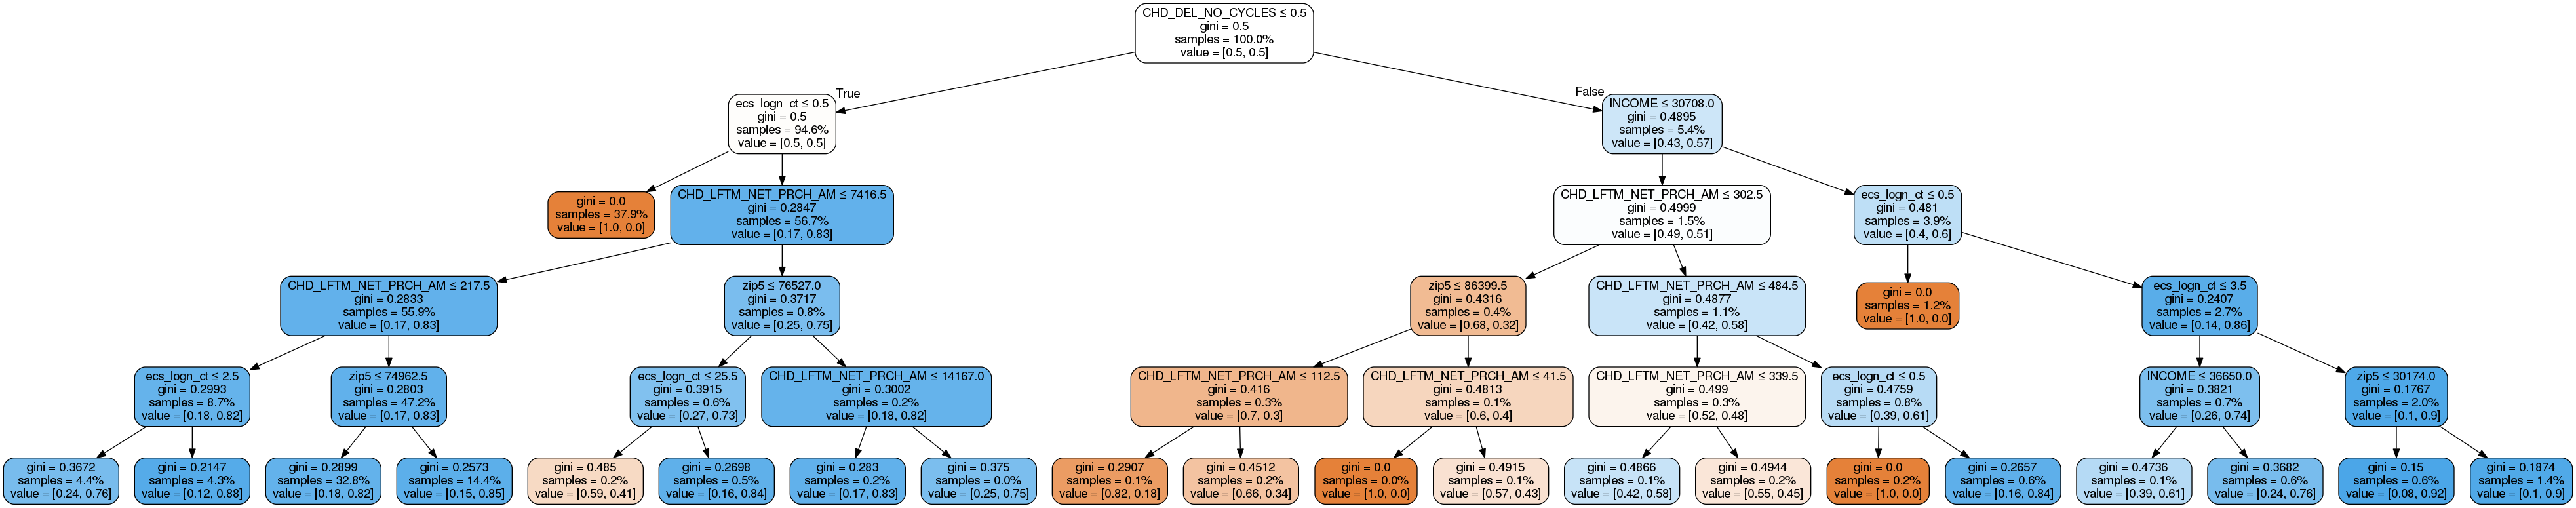

Tree : 1


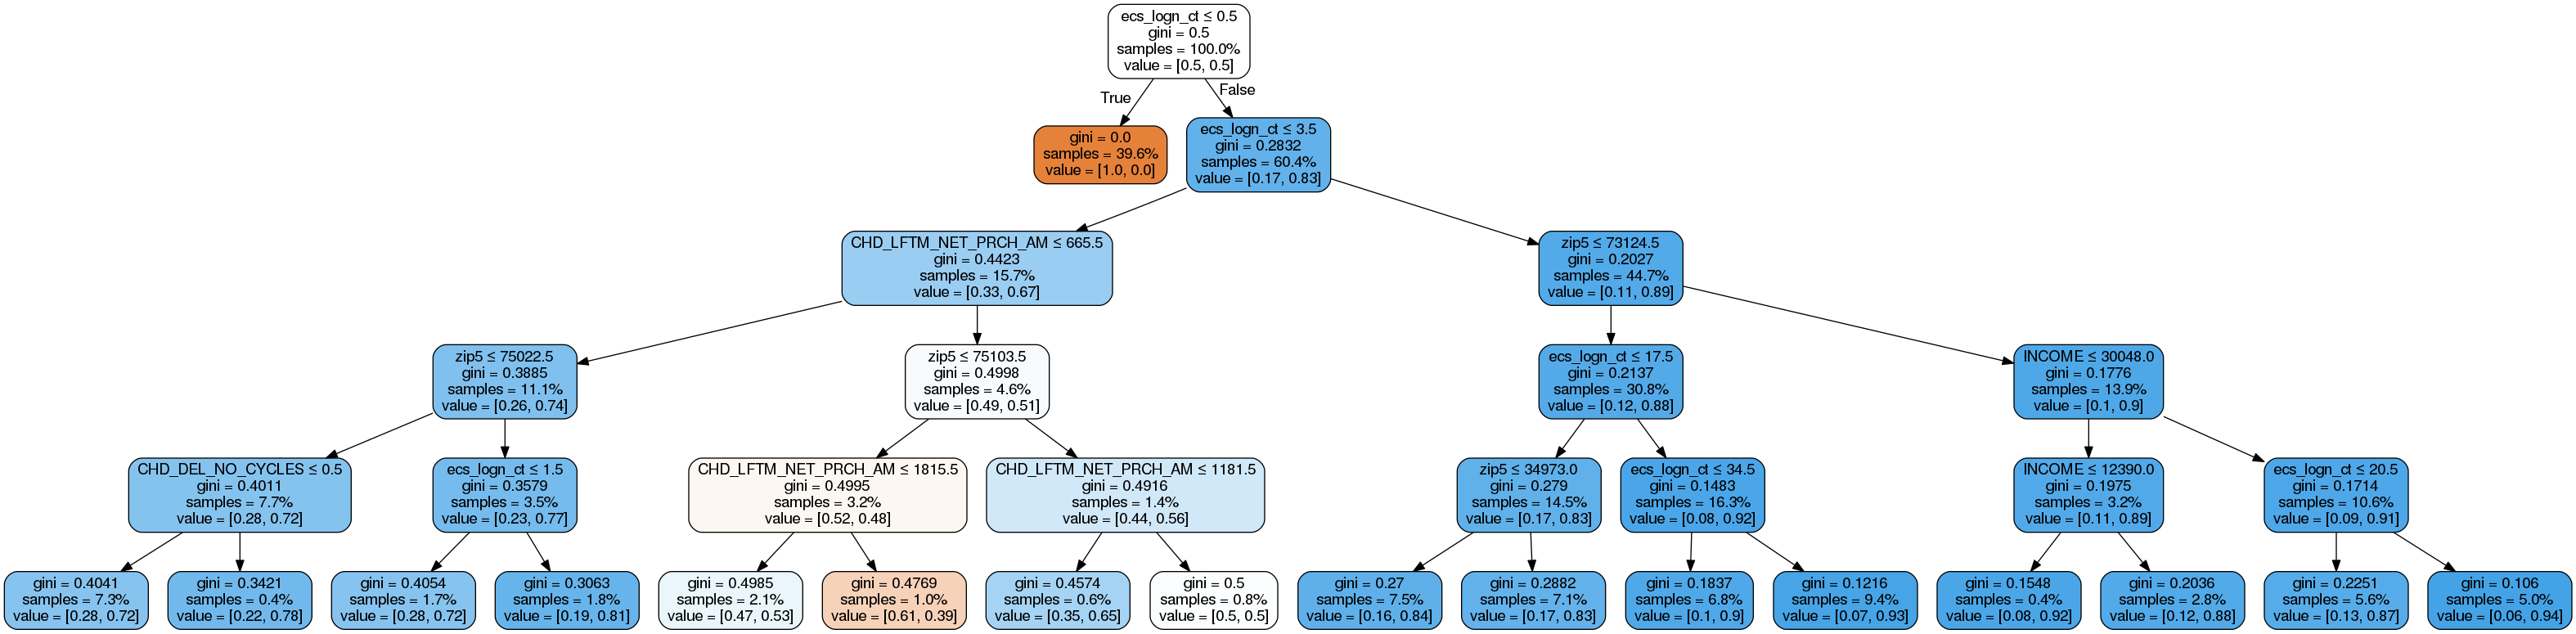

Tree : 2


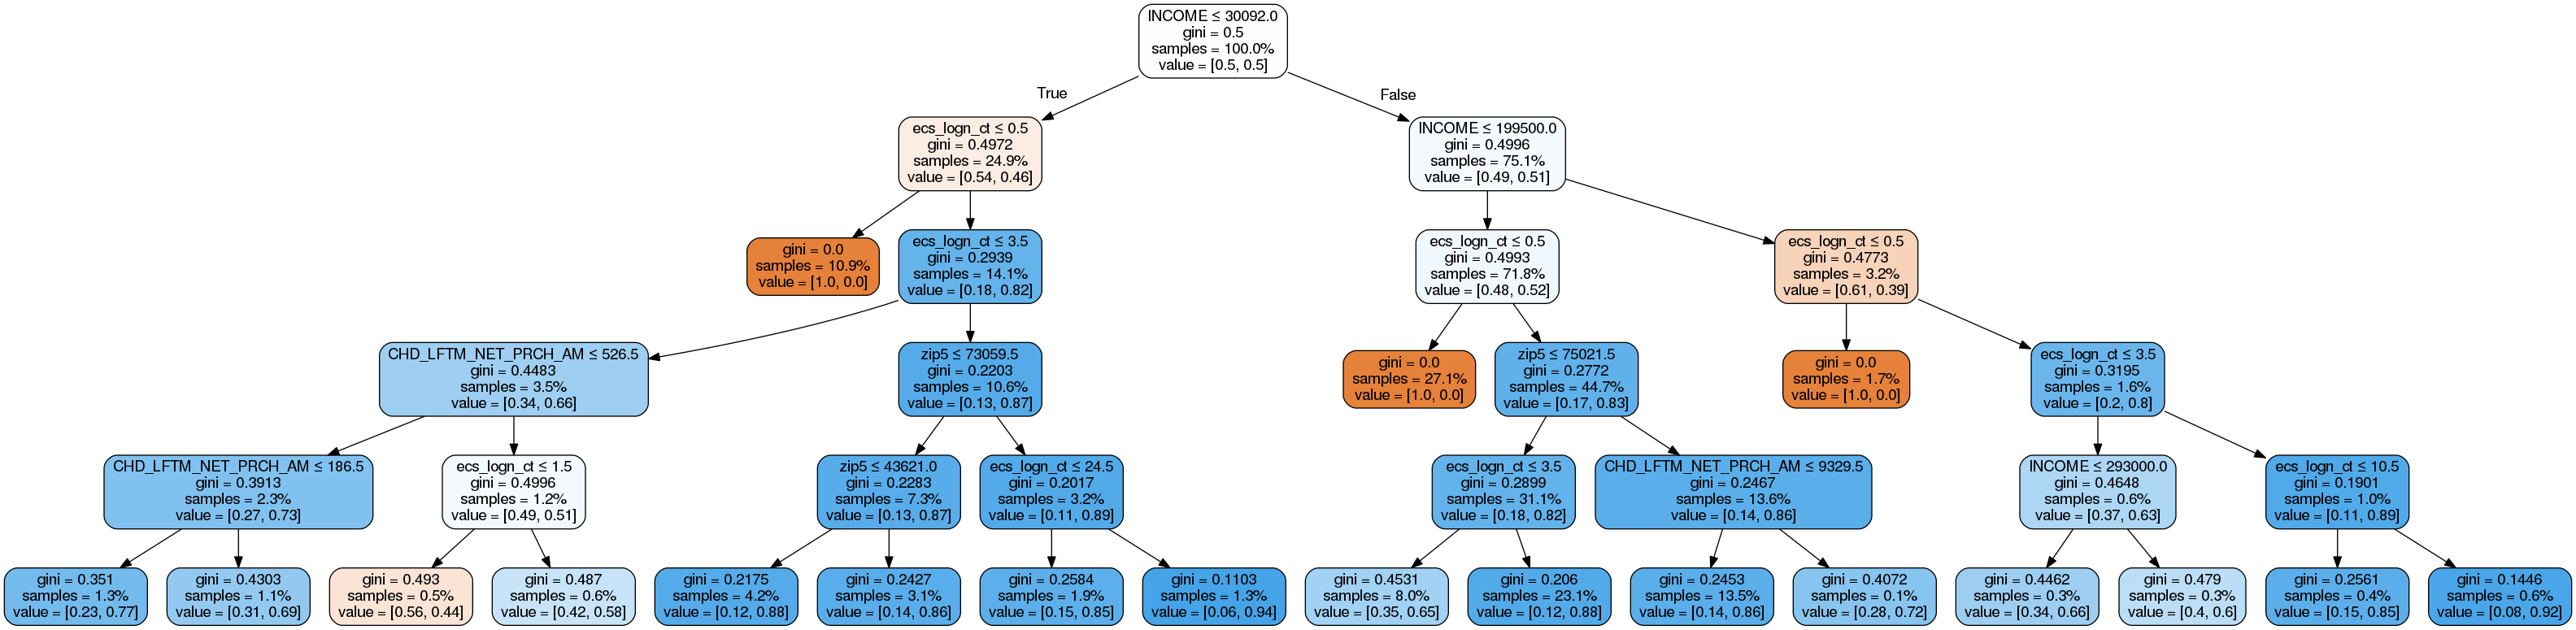

In [127]:
i_tree = 0
for tree_in_forest in rf.estimators_:
    
    dot_data = tree.export_graphviz(decision_tree=tree_in_forest, 
                                    out_file=None,
                                    feature_names=schema,
                                    filled=True,
                                    impurity=True,
                                    rounded=True,
                                    special_characters=True,
                                   proportion=True)    
    graph = pydotplus.graph_from_dot_data(dot_data)     
    tree_image = Image(graph.create_png())    
    
    nodes = graph.get_node_list()
    edges = graph.get_edge_list()    
    
    print 'Tree : ' + str(i_tree)    
    
    display(tree_image)        
    
    i_tree = i_tree + 1

